In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
train_df=pd.read_csv("train.txt",sep=";",names=["text","label"])
val_df=pd.read_csv("val.txt",sep=";",names=["text","label"])
test_df=pd.read_csv("test.txt",sep=";",names=["text","label"])
df = pd.concat([train_df, val_df, test_df], ignore_index=True)
print(df.head())

                                                text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [ ]:
df['label'].value_counts()

,count
label,
joy,6761
sadness,5797
anger,2709
fear,2373
love,1641
surprise,719


<Axes: title={'center': 'Emotion distribution'}, xlabel='label'>

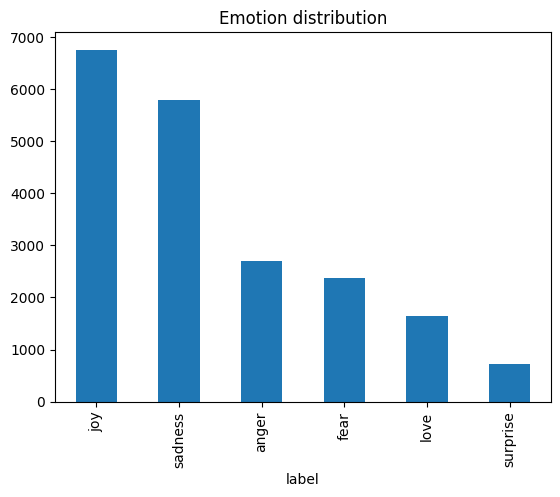

In [ ]:
df['label'].value_counts().plot(kind='bar',title="Emotion distribution")

In [ ]:
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['text']=df['text'].str.lower()

In [ ]:
tokenizer=Tokenizer(num_words=10000,oov_token="nothing")
tokenizer.fit_on_texts(df['text'])
sequences=tokenizer.texts_to_sequences(df['text'])
max_len=200
padded=pad_sequences(sequences,maxlen=max_len,padding='post')
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['label'])


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, stratify=labels)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,LSTM
model=Sequential([
    Embedding(input_dim=10000,output_dim=64,input_length=max_len),
    LSTM(64),
    Dense(6,activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.3271 - loss: 1.6026 - val_accuracy: 0.3434 - val_loss: 1.5794
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3318 - loss: 1.5824 - val_accuracy: 0.3434 - val_loss: 1.5748
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3343 - loss: 1.5817 - val_accuracy: 0.3434 - val_loss: 1.5742
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3346 - loss: 1.5844 - val_accuracy: 0.3434 - val_loss: 1.5754
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.3327 - loss: 1.5755 - val_accuracy: 0.3434 - val_loss: 1.5765
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3372 - loss: 1.5750 - val_accuracy: 0.3434 - val_loss: 1.5752
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.3362 - loss: 1.5800 - val_accuracy: 0.3434 - val_loss: 1.5761
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.3305 - loss: 1.5734 - val_accur

In [ ]:
model.evaluate(X_test, y_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3322 - loss: 1.5958


[1.5753984451293945, 0.33799999952316284]

In [ ]:
def predict_emotion(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(sequence, maxlen=max_len, padding='post')
    pred = model.predict(padded_seq)
    emotion = label_encoder.inverse_transform([pred.argmax()])
    return emotion[0]


In [ ]:
def generate_reply(emotion):
    replies = {
        'sadness': "I'm here for you. You're not alone 💙",
        'joy': "That's awesome! Keep smiling 😄",
        'anger': "Take a deep breath. Want to talk about it?",
        'fear': "You're safe now. I'm with you.",
        'love': "Love is beautiful! 💖",
        'surprise': "Whoa! That’s unexpected 😲"
    }
    return replies.get(emotion, "I'm listening...")
input_text = "I am happy"
emotion = predict_emotion(input_text)
reply = generate_reply(emotion)
print(f"Emotion: {emotion} | Reply: {reply}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Emotion: joy | Reply: That's awesome! Keep smiling 😄


In [ ]:

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
from keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Define improved model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=10,
                   class_weight=class_weights)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1976 - loss: 1.8006 - val_accuracy: 0.3434 - val_loss: 1.7565
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.1380 - loss: 1.7983 - val_accuracy: 0.0394 - val_loss: 1.7955
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.1192 - loss: 1.8046 - val_accuracy: 0.0725 - val_loss: 1.7924
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1090 - loss: 1.8116 - val_accuracy: 0.3434 - val_loss: 1.7860
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.2146 - loss: 1.7835 - val_accuracy: 0.0725 - val_loss: 1.7830
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.1030 - loss: 1.8022 - val_accuracy: 0.3434 - val_loss: 1.7739
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1319 - loss: 1.8128 - val_accuracy: 0.0725 - val_loss: 1.7886
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.1046 - loss: 1.7979 - val_a

In [ ]:
input_text = "Shinchan loves Nanaco"
emotion = predict_emotion(input_text)
reply = generate_reply(emotion)
print(f"Emotion: {emotion} | Reply: {reply}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Emotion: love | Reply: Love is beautiful! 💖


In [ ]:
import json

# Define the smart reply bank
reply_bank = {
    "joy": ["That's awesome! 😄", "Glad to hear that!", "Keep smiling!"],
    "anger": ["Take a deep breath.", "Would you like to talk about it?", "I understand your frustration."],
    "sadness": ["I'm here for you.", "Sending you strength 💪", "Things will get better soon."],
    "fear": ["Stay strong, you're not alone.", "Everything will be okay.", "Facing your fears is brave."],
    "love": ["Aww, that's sweet ❤️", "Love makes everything better.", "Spread the love!"],
    "surprise": ["Whoa! That's unexpected!", "What a twist!", "Really? Tell me more!"]
}

# Save it as a .json file in your Colab working directory
with open("emotion_reply_bank.json", "w") as f:
    json.dump(reply_bank, f, indent=4)

print("✅ JSON file created in your Colab environment!")


✅ JSON file created in your Colab environment!


In [ ]:
import json
import random

# Load reply bank
with open("emotion_reply_bank.json", "r") as f:
    reply_bank = json.load(f)

# Enhanced smart reply generation
def generate_smart_replies(text, predicted_emotion):
    user_words = text.lower().split()
    replies = reply_bank.get(predicted_emotion, [])

    # Prioritize replies that share words with user input
    keyword_filtered = [r for r in replies if any(word in r.lower() for word in user_words)]

    if len(keyword_filtered) >= 3:
        final_replies = random.sample(keyword_filtered, 3)
    elif len(replies) >= 3:
        final_replies = random.sample(replies, 3)
    else:
        final_replies = replies

    return final_replies

# Example usage:
emotion = predict_emotion("What a lovely day")
print(generate_smart_replies("What a lovely day", emotion))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
['Love makes everything better.', "Aww, that's sweet ❤️", 'Spread the love!']
